# 1. Dataset `MNIST` von Keras - Model 1

- `MNIST` is a dataset of hand-drawn numerals, each on a 28 x 28 pixel grid. Every individual data point is an unsigned 8-bit integer (`tf.uint8`), as are the labels.
- `MNIST` ist ein Datensatz von handgezeichneten Ziffern, die sich jeweils in einem 28 x 28 Pixel großen Raster befinden. Jeder einzelne Datenpunkt ist eine vorzeichenlose 8-Bit-Ganzzahl (`tf.uint8`), ebenso wie die Beschriftungen.

In [1]:
import tensorflow as tf
import datetime, os
import tensorboard
%load_ext tensorboard

In [2]:
print('TensorFlow version:    {}'.format(tf.__version__))
print('Eager execution is:    {}'.format(tf.executing_eagerly()))
print('Keras version is:      {}'.format(tf.keras.__version__))

TensorFlow version:    2.2.0
Eager execution is:    True
Keras version is:      2.3.0-tf


In [3]:
# Acquire the data. 
# Erfassen Sie die Daten
# ds_<name> == Dataset_Name
ds_mnist = tf.keras.datasets.mnist

In [4]:
(train_x, train_y), (test_x, test_y) = ds_mnist.load_data()

In [5]:
train_x.shape

(60000, 28, 28)

In [6]:
tf.rank(train_x)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [7]:
train_y.shape

(60000,)

In [8]:
test_x.shape

(10000, 28, 28)

In [9]:
test_y.shape

(10000,)

In [10]:
print(train_x[0][0:28])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [11]:
train_x[59999][0:,0:,].shape

(28, 28)

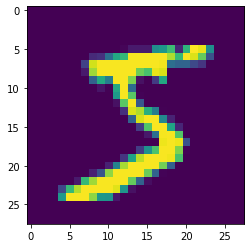

In [12]:
import matplotlib.pyplot as plt
#plt.gray()
plt.imshow(train_x[0][0:28])
plt.savefig("images/image001.png")

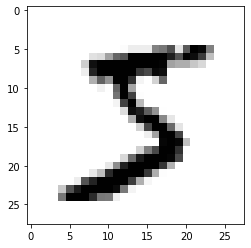

In [13]:
plt.imshow(train_x[0], cmap='binary')

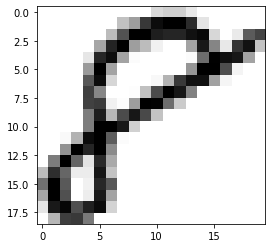

In [14]:
plt.imshow(train_x[59999][6:-3,6:-2,], cmap='binary')

In [15]:
train_x[59999][6:-3,6:-2,].shape

(19, 20)

In [16]:
# Normal Image Size:
28*28

784

In [17]:
# After Optimazing Image Size is:
19*20

380

In [18]:
# There is a place for anather image
784-380

404

In [19]:
epochs=10

In [20]:
# 32 is default in fit method but specify if you want
batch_size = 32

## Normalizing the Dataset

Normlize all the data points(`x`) to be in float range zero to one, and of the `float32`???? type. <br>
Cast the labels(`y`) to `int64`, as required.

Normieren Sie alle Datenpunkte (`x`) so, dass sie im Float-Bereich von null bis eins liegen und von` float32` ???? Art.<br>
Gießen Sie die Beschriftungen (`y`) nach Bedarf auf `int64`.

In [21]:
# Data Normalization 0 .. 1
# train_x, test_x = tf.cast(train_x/255., tf.float32), tf.cast(test_x/255., tf.float32) # toll aber nicht gut schnel zu lesen
train_x = tf.cast(train_x/255., tf.float32)
train_y = tf.cast(train_y, tf.int64)

test_x = tf.cast(test_x/255., tf.float32)
test_y = tf.cast(test_y, tf.int64)

## Model `model1` definition
### `model1 = tf.keras.models.Sequential([<Layers>])`

In [22]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

In [23]:
optimizer = tf.keras.optimizers.Adam()

In [24]:
model1.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [26]:
model1.fit(train_x, train_y, 
           batch_size, epochs, 
           validation_data=(test_x, test_y), 
           validation_batch_size=batch_size, 
           callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2192 - accuracy: 0.9351 - val_loss: 0.1049 - val_accuracy: 0.9673
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0963 - accuracy: 0.9707 - val_loss: 0.0763 - val_accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9790 - val_loss: 0.0685 - val_accuracy: 0.9787
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9830 - val_loss: 0.0633 - val_accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0420 - accuracy: 0.9861 - val_loss: 0.0716 - val_accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9876 - val_loss: 0.0654 - val_accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0592 - val_accuracy:

In [27]:
tf.python.keras.callbacks.History # at 0x1c5d87bde88

tensorflow.python.keras.callbacks.History

### `model1.sumary()` 

In [28]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### `model1.evaluate(test_x, test_y)`

In [29]:
model1.evaluate(test_x, test_y)

313/313 [==============================] - 0s 945us/step - loss: 0.0739 - accuracy: 0.9822


[0.07385178655385971, 0.982200026512146]

In [30]:
#%reload_ext tensorboard
%tensorboard --logdir logs/fit-model1

Reusing TensorBoard on port 6006 (pid 17040), started 1 day, 12:57:06 ago. (Use '!kill 17040' to kill it.)